## 1. Loading the MNIST dataset in Keras

In [19]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

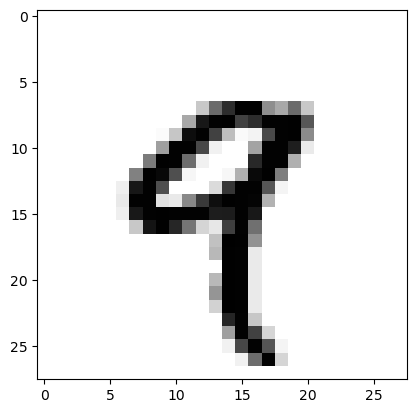

In [20]:
import matplotlib.pyplot as plt
digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [21]:
print(train_images.shape)
print(len(train_labels))

print(test_images.shape)
print(len(test_labels))

(60000, 28, 28)
60000
(10000, 28, 28)
10000


## 2. The network architecture

In [22]:
from tensorflow import keras 
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

# 3. The compilation step

In [23]:
model.compile(optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"])

# 4. Preparing the image data

In [24]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255 
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

# 5. fit the model

In [25]:
model.fit(train_images, train_labels, epochs=5, batch_size=3000)

Epoch 1/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6340 - loss: 1.2521
Epoch 2/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8862 - loss: 0.4188
Epoch 3/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9086 - loss: 0.3267
Epoch 4/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9177 - loss: 0.2858
Epoch 5/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9356 - loss: 0.2366


# 6. Prediction

In [26]:
test_digits = test_images[0:10]
predictions = model.predict(test_digits)
predictions[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


array([5.1098574e-05, 4.5396988e-07, 3.7278412e-04, 2.0843369e-03,
       1.4694141e-06, 2.2377459e-05, 1.7528592e-07, 9.9600548e-01,
       5.3716623e-05, 1.4081585e-03], dtype=float32)

# 7. Evaluating the model on new data

In [27]:
test_loss, test_acc = model.evaluate(test_images, test_labels, batch_size = 200)
print(f"test_acc: {test_acc}")

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9062 - loss: 0.2983
test_acc: 0.9189000129699707
